## Image Generation Demo (Stable Diffusion)
Using Diffusers pipeline to generate an image from text.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# First time only: Download & Save Model
import os
from diffusers import DiffusionPipeline
import torch

model_path = "/content/drive/MyDrive/sd15_local"

if not os.path.exists(model_path):
    print("Downloading model from HuggingFace ...")

    model_id = "runwayml/stable-diffusion-v1-5"

    pipe = DiffusionPipeline.from_pretrained(
        model_id,
        torch_dtype=torch.float16
    )

    pipe.save_pretrained(model_path)
    print("Model saved to Drive!")
else:
    print("Model already exists on Drive.")


Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

config.json: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


Model saved to Drive!


In [ ]:
!pip uninstall -y torch torchvision torchaudio diffusers transformers accelerate
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu121
!pip install diffusers transformers accelerate safetensors

Found existing installation: torch 2.9.0+cu126
Uninstalling torch-2.9.0+cu126:
  Successfully uninstalled torch-2.9.0+cu126
Found existing installation: torchvision 0.24.0+cu126
Uninstalling torchvision-0.24.0+cu126:
  Successfully uninstalled torchvision-0.24.0+cu126
Found existing installation: torchaudio 2.9.0+cu126
Uninstalling torchaudio-2.9.0+cu126:
  Successfully uninstalled torchaudio-2.9.0+cu126
Found existing installation: diffusers 0.36.0
Uninstalling diffusers-0.36.0:
  Successfully uninstalled diffusers-0.36.0
Found existing installation: transformers 4.57.6
Uninstalling transformers-4.57.6:
  Successfully uninstalled transformers-4.57.6
Found existing installation: accelerate 1.12.0
Uninstalling accelerate-1.12.0:
  Successfully uninstalled accelerate-1.12.0
Looking in indexes: https://download.pytorch.org/whl/cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 780.4/780.4 MB 1.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.3/7.3 MB 97.7 MB/s eta 0:00:0

In [ ]:
import os
from diffusers import DiffusionPipeline
import torch
model_path = "/content/drive/MyDrive/sd15_local"

pipe = DiffusionPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16
)

pipe = pipe.to("cuda" if torch.cuda.is_available() else "cpu")

print("Stable Diffusion ready 🚀")

ValueError: module functions cannot set METH_CLASS or METH_STATIC

In [ ]:
import torch
from contextlib import nullcontext

device = "cuda" if torch.cuda.is_available() else "cpu"

def generate_image(pipe, prompt, seed=None, negative_prompt=None, steps=25, cfg=7.5):
    if seed is None:
        seed = torch.seed()
    generator = torch.Generator(device=device).manual_seed(seed)
    amp_ctx = torch.autocast("cuda") if device == "cuda" else nullcontext()

    with torch.inference_mode(), amp_ctx:
        result = pipe(
            prompt=prompt,
            negative_prompt=negative_prompt,
            num_inference_steps=steps,
            guidance_scale=cfg,
            generator=generator,
        )
    return result.images[0]

In [ ]:
import matplotlib.pyplot as plt

def show_two_images(img1, title1, img2, title2):
    plt.figure(figsize=(10,5))

    # Image 1
    plt.subplot(1,2,1)
    plt.imshow(img1)
    plt.title(title1, fontsize=12)
    plt.axis("off")

    # Image 2
    plt.subplot(1,2,2)
    plt.imshow(img2)
    plt.title(title2, fontsize=12)
    plt.axis("off")

    plt.tight_layout()
    plt.show()


In [ ]:
prompt = "A futuristic AI lab, holographic screens, ultra detailed"
#"مختبر ذكاء اصطناعي مستقبلي، شاشات هولوجرام، تفاصيل عالية جدًا"



## 1: Comparison: Randomness (No Seed)

**Left Image:** Generated without specifying a seed  
**Right Image:** Generated again without specifying a seed  

**Observation:**  
The images differ because each run starts from a new random noise pattern.

**Conclusion:**  
Removing the seed introduces variability in the generated outputs.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

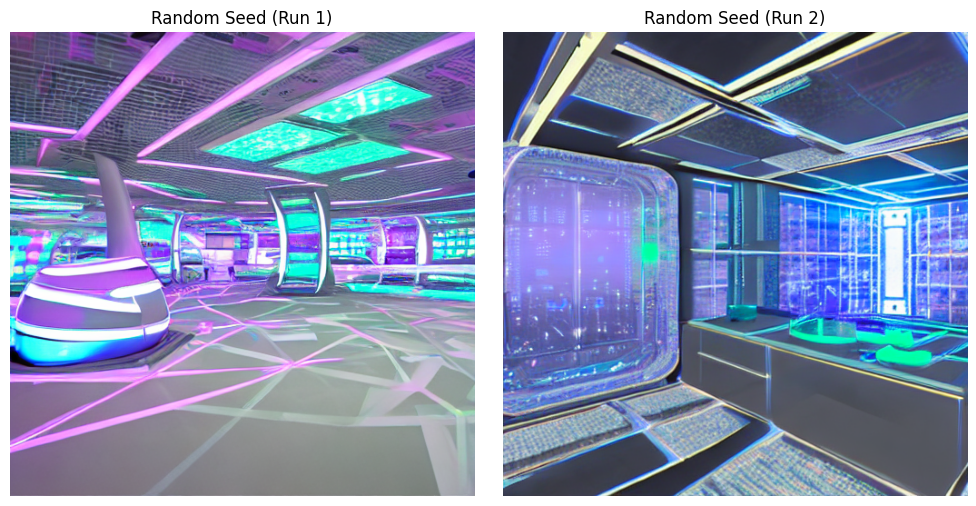

In [ ]:
img1 = generate_image(pipe, prompt)
img2 = generate_image(pipe, prompt)

show_two_images(img1, "Random Seed (Run 1)",
                img2, "Random Seed (Run 2)")



## 2: Comparison: Reproducibility (Seed Control)

**Left Image:** Generated using a fixed seed (Seed = 123)  
**Right Image:** Generated again with the same seed  

**Observation:**  
Both images are identical because the model starts from the same initial noise pattern.

**Conclusion:**  
Fixing the seed ensures reproducible and repeatable results.


  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

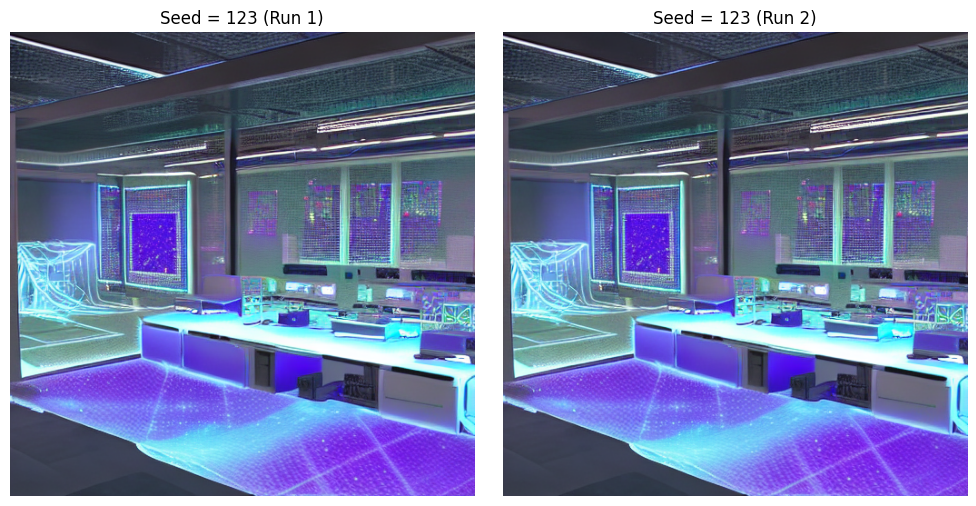

In [ ]:

img3 = generate_image(pipe, prompt, seed=123)
img4 = generate_image(pipe, prompt, seed=123)

show_two_images(img3, "Seed = 123 (Run 1)",
                img4, "Seed = 123 (Run 2)")




## 3: Comparison: Inference Steps

**Left Image:** 10 inference steps  
**Right Image:** 40 inference steps  

**Observation:**  
The right image shows sharper details and cleaner structure.

**Conclusion:**  
Increasing inference steps improves image refinement, but increases generation time.


  0%|          | 0/10 [00:00<?, ?it/s]

  0%|          | 0/40 [00:00<?, ?it/s]

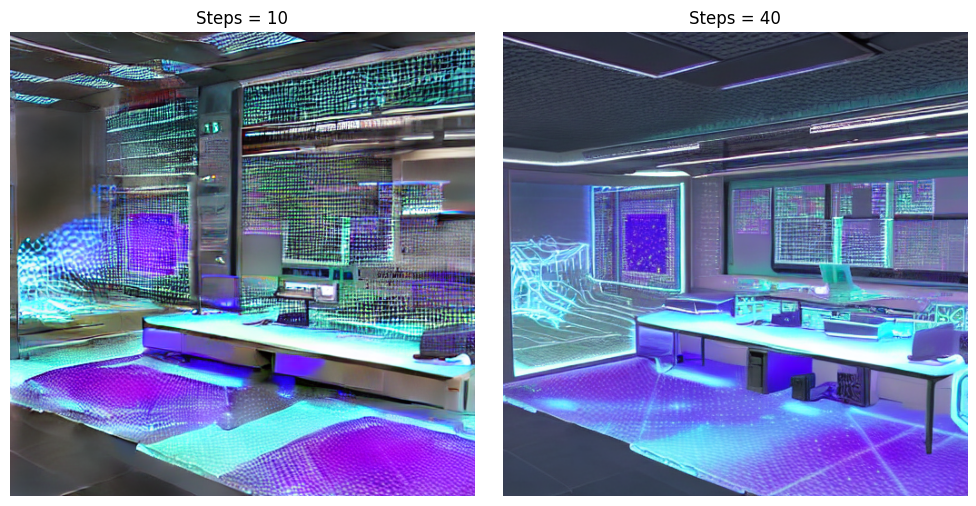

In [ ]:
img_low  = generate_image(pipe, prompt, seed=123, steps=10)
img_high = generate_image(pipe, prompt, seed=123, steps=40)

show_two_images(img_low, "Steps = 10",
                img_high, "Steps = 40")



## 4: Comparison: Guidance Scale (CFG)

**Left Image:** CFG = 3  
**Right Image:** CFG = 12  

**Observation:**  
The right image follows the prompt more strictly, while the left image shows more creative variation.

**Conclusion:**  
Higher CFG enforces stronger adherence to the prompt.

  0%|          | 0/25 [00:00<?, ?it/s]

  0%|          | 0/25 [00:00<?, ?it/s]

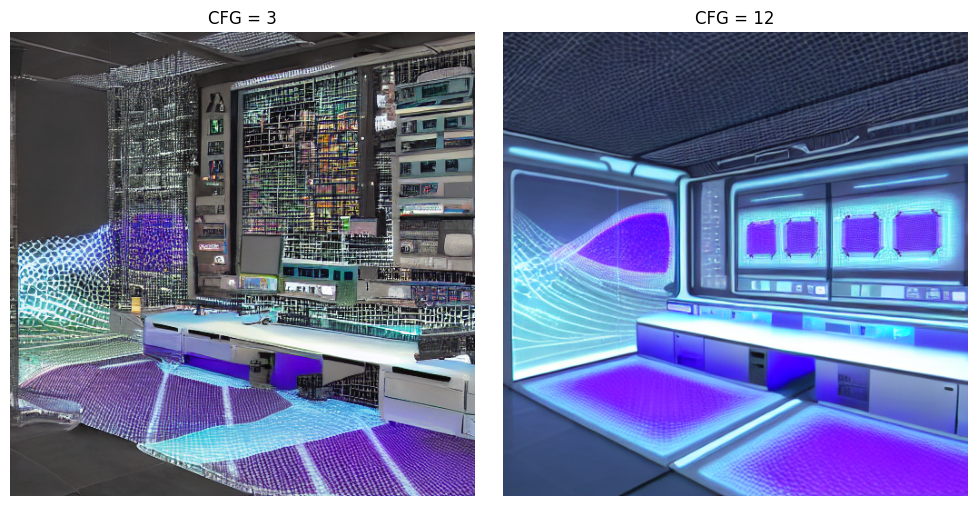

In [ ]:
img_low_cfg  = generate_image(pipe, prompt, seed=123, cfg=3)
img_high_cfg = generate_image(pipe, prompt, seed=123, cfg=12)

show_two_images(img_low_cfg, "CFG = 3",
                img_high_cfg, "CFG = 12")



## Final Takeaway

- **Seed** controls reproducibility  
- **Inference Steps** control refinement quality  
- **CFG Scale** controls prompt faithfulness  